# DATA SCIENCE SALARY 2023

Data Science Job Salaries Dataset contains 11 columns, each are:

work_year: The year the salary was paid.

experience_level: The experience level in the job during the year

employment_type: The type of employment for the role

job_title: The role worked in during the year.

salary: The total gross salary amount paid.

salary_currency: The currency of the salary paid as an ISO 4217 currency code.

salaryinusd: The salary in USD

employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.

remote_ratio: The overall amount of work done remotely

company_location: The country of the employer's main office or contracting branch

company_size: The median number of people that worked for the company during the year

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import plotly 
import plotly.express as px

In [2]:
salary_data= pd.read_csv("ds_salaries.csv")

In [3]:
salary_df=pd.DataFrame(salary_data)
salary_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [4]:
salary_df.isnull().sum()
## DATA'DA BLANK VAR MI KONTROL EDİLİR.
## DATA ÜZERİNDE İŞLEM YAPILABİLİR.

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# DATA HAZIRLIK

In [5]:
# EXPERIENCE LEVEL KATEGORİSİNDE Kİ KISALTMALAR DÜZELTİLİR.
salary_df["experience_level"].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

There 4 different categories of the Experience level :-

SE stands for 'Senior Executive'

MI stands for 'Mid level/Intermediate'

EN stands for "Enter Level"

EX stands for "Executive level"

In [6]:
salary_df["experience_level"].replace("SE","Senior Executive",inplace=True)
salary_df["experience_level"].replace("MI",'Mid level/Intermediate',inplace=True)
salary_df["experience_level"].replace("EN","Enter Level",inplace=True)
salary_df["experience_level"].replace("EX","Executive level",inplace=True)

In [7]:
salary_df["experience_level"].head(5)

0          Senior Executive
1    Mid level/Intermediate
2    Mid level/Intermediate
3          Senior Executive
4          Senior Executive
Name: experience_level, dtype: object

In [8]:
# EMPLOYMENT TYPE KATEGORİSİNDE Kİ KISALTMALAR DÜZELTİLİR.
salary_df['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

The employment type is also divided into four different categories :-

FT stands for "Full Time"

CT stands for "Contract "

FL stands for "Freelance "

PT stands for "Partime"


In [9]:
salary_df['employment_type'].replace("FT","Full Time",inplace=True)
salary_df['employment_type'].replace("CT","Contract",inplace=True)
salary_df['employment_type'].replace("FL","Freelance",inplace=True)
salary_df['employment_type'].replace("PT","Partime",inplace=True)

In [24]:
salary_df["salary_currency"].unique()

array(['EUR', 'USD', 'INR', 'HKD', 'CHF', 'GBP', 'AUD', 'SGD', 'CAD',
       'ILS', 'BRL', 'THB', 'PLN', 'HUF', 'CZK', 'DKK', 'JPY', 'MXN',
       'TRY', 'CLP'], dtype=object)

In [30]:
salary_df[salary_df["salary_currency"]==("TRY")]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3597,2021,Mid level/Intermediate,Full Time,Data Engineer,108000,TRY,12103,TR,0,TR,M
3624,2021,Senior Executive,Full Time,Data Scientist,180000,TRY,20171,TR,50,TR,L
3634,2021,Mid level/Intermediate,Full Time,Data Engineer,250000,TRY,28016,TR,100,TR,M


In [218]:
salary_df.sort_values(by="work_year",ascending=False,inplace=True)
salary_df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior Executive,Full Time,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1197,2023,Enter Level,Full Time,Data Analyst,75000,USD,75000,US,100,US,M
1209,2023,Senior Executive,Full Time,Machine Learning Engineer,147100,USD,147100,US,0,US,M
1208,2023,Enter Level,Full Time,Research Engineer,60000,USD,60000,GB,100,GB,M
1207,2023,Enter Level,Full Time,Research Engineer,120000,USD,120000,GB,100,GB,M
1206,2023,Mid level/Intermediate,Full Time,Machine Learning Engineer,40000,GBP,48609,GB,100,GB,M
1204,2023,Senior Executive,Full Time,Data Manager,120000,USD,120000,US,0,US,M
1203,2023,Senior Executive,Full Time,Data Manager,140000,USD,140000,US,0,US,M
1202,2023,Senior Executive,Full Time,Data Scientist,182200,USD,182200,US,100,US,M
1214,2023,Senior Executive,Full Time,Data Analyst,108000,USD,108000,US,0,US,M


# DATA GÖRSELLEŞTİRME

In [81]:
job = salary_df['job_title'].value_counts().head(10)
job

Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Applied Scientist              58
Data Science Manager           58
Research Engineer              37
Name: job_title, dtype: int64

<Axes: >

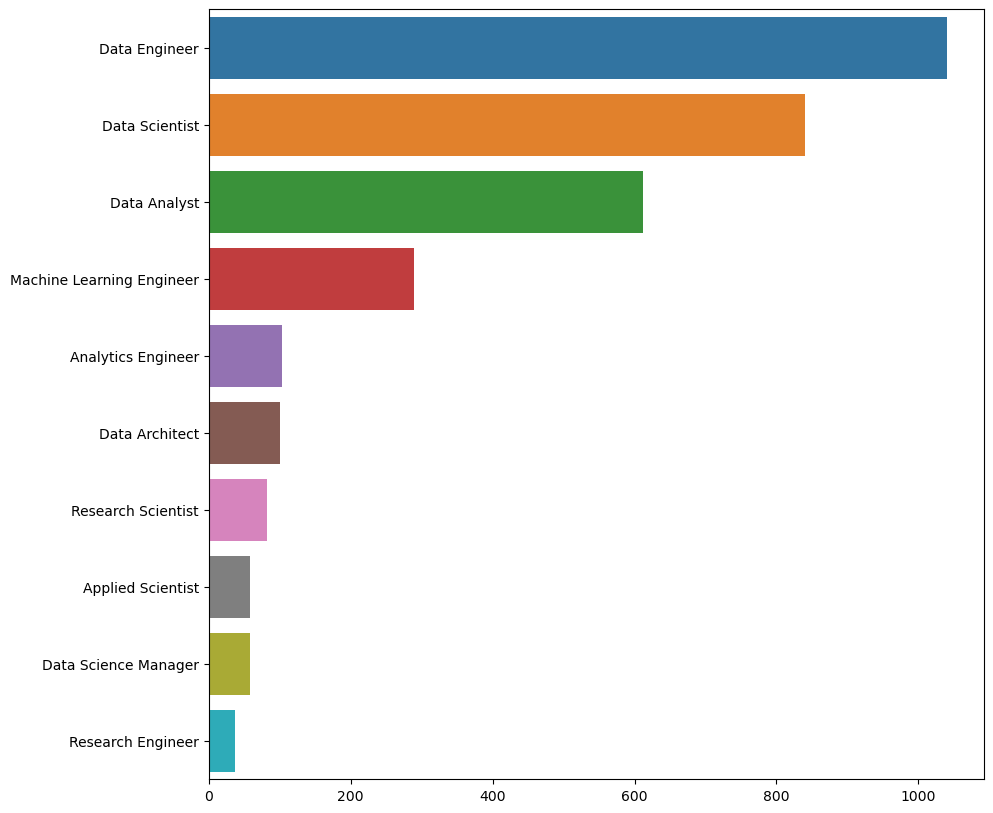

In [141]:
plt.figure(figsize=(10,10))
sbn.barplot(x=job.values,y=job.index)


Job_Title sıralamasına göre şirketlerde yer alan en çok çalışan ilk 3 title: Data Engineer,Data Scientist , Data Analyst

In [123]:
company= salary_df["company_size"].value_counts()
company.values

array([3153,  454,  148], dtype=int64)

([<matplotlib.patches.Wedge at 0x22903642da0>,
 [Text(-0.963404840899184, 0.5308965177245168, 'M'),
  Text(0.8904593532173259, -0.6458189686497152, 'L'),
  Text(1.0915780877709766, -0.13585756621645373, 'S')],
 [Text(-0.5254935495813731, 0.2895799187588273, '84.0%'),
  Text(0.485705101754905, -0.3522648919907537, '12.1%'),
  Text(0.59540622969326, -0.07410412702715656, '3.9%')])

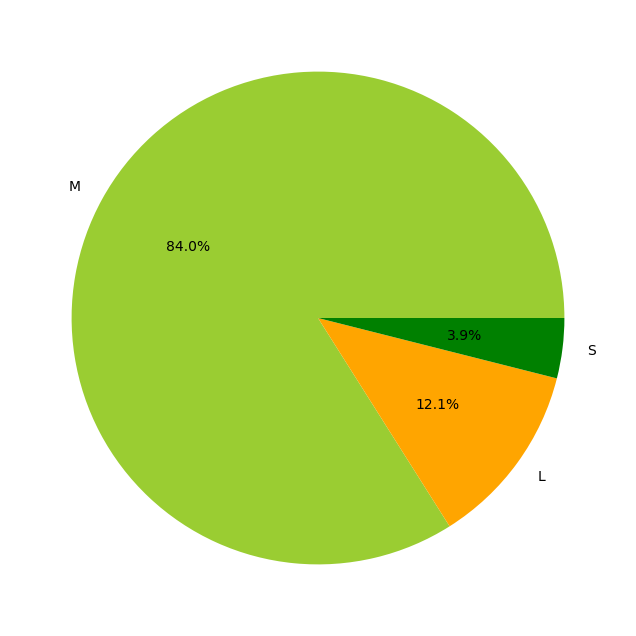

In [142]:
plt.figure(figsize=(8,8))
plt.pie(company,labels=company.index,autopct="%1.1f%%",colors=("yellowgreen","orange","green"))

Şirketlerde çalışan kişilerin %84'ü Medium düzeydeki şirketlerde çalışmaktadır.

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

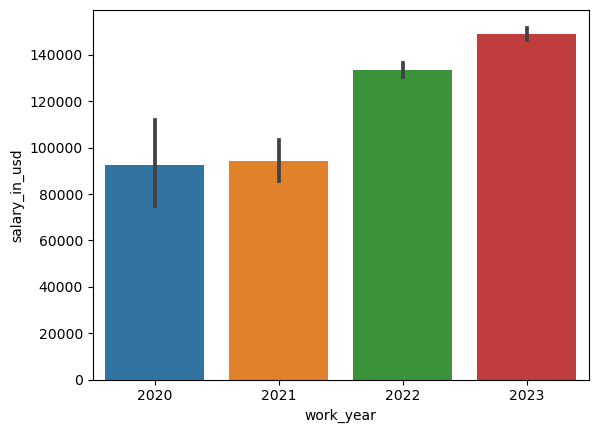

In [156]:
sbn.barplot(x="work_year",y="salary_in_usd",data=salary_df)

In [163]:
experience=salary_df["experience_level"].value_counts()

In [182]:
plt.figure(figsize=(10,10))
px.treemap(experience,path=[experience.index],values=experience.values,title="EXPERIENCE LEVELS",color=["purple","blue","orange","red"])

<Figure size 1000x1000 with 0 Axes>

<Axes: xlabel='Job Title', ylabel='Salary In USD'>

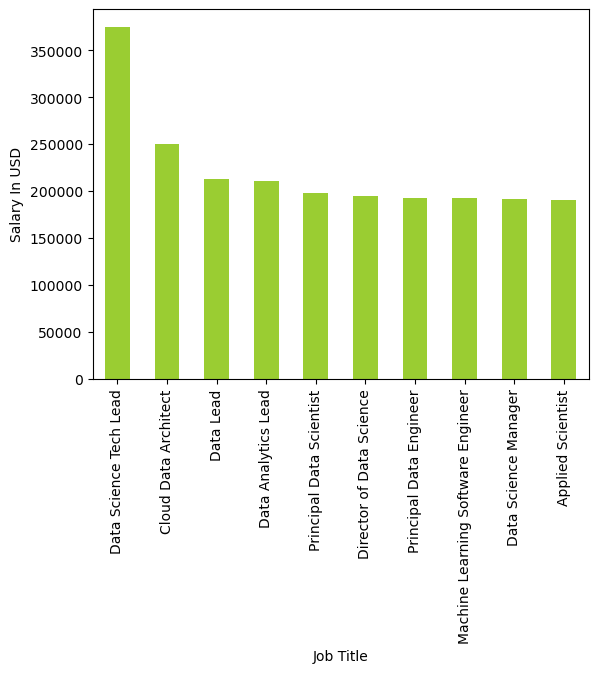

In [216]:
salary_df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending=False)[:10].plot.bar(xlabel="Job Title",ylabel="Salary In USD",color="yellowgreen")

Job_title gruplanır ve ortalama maaşlar alınır.Çoktan aza doğru sıralanan maaşlar arasından ilk 10'u seçilir.

Elde ettiğimiz veriye göre dolar bazında en çok maaşı Data Science Tech Lead title'ına sahip çalışanlar almaktadır.